# Setup

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', 100)

# Importing the Data File

In [70]:
oscars_df = pd.read_csv("../data/Oscars-demographics-DFE.csv")

#Print number of rows and columns
oscars_nrows = oscars_df.shape[0]
oscars_ncols = oscars_df.shape[1]

print('There are: ', oscars_nrows, 'rows')
print('There are: ',oscars_ncols, 'columns')

There are:  441 rows
There are:  28 columns


In [71]:
oscars_df.head()

,Unnamed: 0,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,race_ethnicity:confidence,religion,religion:confidence,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,1.0,Na,1.0,Straight,1.0000,1927,1.0000,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,1.0,Na,1.0,Straight,0.6842,1930,1.0000,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,1.0,Na,1.0,Straight,1.0000,1931,0.6667,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,1.0,Na,1.0,Straight,1.0000,1932,1.0000,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,1.0,Roman Catholic,1.0,Straight,1.0000,1933,1.0000,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


## Describing the Data

In [72]:
#print(oscars_df.columns)
#print(oscars_df.head())
#print(oscars_df.tail())
#print(oscars_df.sample())
print(oscars_df.describe())
#print(oscars_df.value_counts())

       Unnamed: 0      _unit_id  _trusted_judgments  birthplace:confidence  \
count   441.00000  4.410000e+02          441.000000             441.000000   
mean    220.00000  6.704825e+08            7.637188               0.995259   
std     127.44999  1.139974e+05           19.015541               0.038917   
min       0.00000  6.704544e+08            3.000000               0.657100   
25%     110.00000  6.704545e+08            3.000000               1.000000   
50%     220.00000  6.704546e+08            3.000000               1.000000   
75%     330.00000  6.704547e+08            3.000000               1.000000   
max     440.00000  6.709729e+08           95.000000               1.000000   

       date_of_birth:confidence  race_ethnicity:confidence  \
count                441.000000                 441.000000   
mean                   0.996607                   0.999130   
std                    0.032060                   0.016438   
min                    0.656200                  

## Observations
* Each column represents these variables: _unit_id	_golden	_unit_state	_trusted_judgments	_last_judgment_at	birthplace	birthplace:confidence	date_of_birth	date_of_birth:confidence	race_ethnicity	race_ethnicity:confidence	religion	religion:confidence	sexual_orientation	sexual_orientation:confidence	year_of_award	year_of_award:confidence	award	biourl	birthplace_gold	data_of_birth_gold	movie	person	race_ethnicity_gold	religion_gold	sexual_orientation_gold	year_of_award_gold!
* Each row represents an academy award winner
* The Oscar awards won that are represented in this data set are the major categories: best director,best actor, best actress, best supporting actor, best supporting actress.

### Some ranges of the data 
* years of award gold span from 1942-2006.
* year of award range is 1927 - 2014
* Ethnicities: Black, White, Hispanic, Middle Eastern, Multicultural

In [73]:
# The purpose of this cell is to find out how many winners are not white

# How many total winners
print('Number of Total Winners', oscars_df['race_ethnicity'].count())

#How many winners that aren't white
row_filter = oscars_df['race_ethnicity']=='White'
oscars_df2 = oscars_df[-row_filter]
print('Number of Ethnically Diverse Winners', oscars_df2['race_ethnicity'].count())

print(oscars_df2['race_ethnicity'])

#making percentages 
total = oscars_df['race_ethnicity'].count()
diverse = oscars_df2['race_ethnicity'].count()
white = total - diverse
diverse_percentage = diverse / total * 100
white_percentage = white / total * 100

print ('Diverse Percentage', diverse_percentage, '%')
print ('White Percentage', white_percentage, '%')

Number of Total Winners 441
Number of Ethnically Diverse Winners 30
79              Asian
86              Asian
109          Hispanic
122             Black
141       Multiracial
143    Middle Eastern
160             Black
163             Black
165             Black
189          Hispanic
193          Hispanic
219             Black
221             Asian
226             Black
233             Black
237          Hispanic
241             Black
244          Hispanic
325       Multiracial
341             Black
359             Asian
363          Hispanic
392             Black
393          Hispanic
408             Black
410          Hispanic
411             Black
413             Black
415             Black
433             Black
Name: race_ethnicity, dtype: object
Diverse Percentage 6.802721088435375 %
White Percentage 93.19727891156462 %


# Observations - Race
* By observing the data, from 1942-2014, there has only been 30 ethnically diverse winners while there are 411 white winners
* The percentage of winners for the ethnically diverse is only 6.8% while the percentage of white wins is 93.2%

4


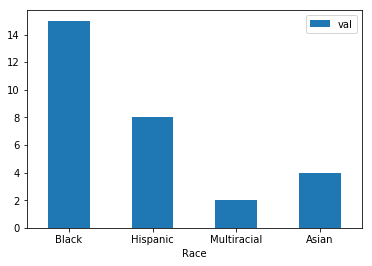

In [108]:
# counter for different ethnicities
bc = 0
hc = 0
mc = 0
ac = 0

# counting each race
for i in oscars_df2['race_ethnicity']:
    if i == 'Black':
        bc += 1
    if i == 'Hispanic':
        hc += 1
    if i == 'Multiracial':
        mc += 1
    if i == 'Asian':
        ac += 1
        

#bar graph
print(ac)
df = pd.DataFrame({'Race':['Black', 'Hispanic', 'Multiracial', 'Asian'], 'val':[bc, hc, mc, ac]})
ax = df.plot.bar(x='Race', y='val', rot=0)

## Observations
* The most amount of awards within the ethnically diverse demographic goes to Black people with 15, then Hispanic with 8, then Asian with 4, and finally multiracial with 2.

##  Names of ethnically diverse actors/actresses

In [75]:
# Names of ethnically diverse actors/actresses
print(oscars_df2['person'])

79               Ang Lee
86               Ang Lee
109          Jose Ferrer
122       Sidney Poitier
141         Ben Kingsley
143    F. Murray Abraham
160    Denzel Washington
163           Jamie Foxx
165      Forest Whitaker
189        Anthony Quinn
193        Anthony Quinn
219     Lou Gossett, Jr.
221        Haing S. Ngor
226    Denzel Washington
233    Cuba Gooding, Jr.
237     Benicio Del Toro
241       Morgan Freeman
244        Javier Bardem
325          Halle Berry
341      Hattie McDaniel
359        Miyoshi Umeki
363          Rita Moreno
392      Whoopi Goldberg
393       Mercedes Ruehl
408      Jennifer Hudson
410        Penelope Cruz
411             Mo'Nique
413      Octavia Spencer
415       Lupita Nyong'o
433             Mo'Nique
Name: person, dtype: object


## Observations
* Even the 30 people that are ethnically diverse, the actual number is less because there are repeats in the data.

In [76]:
# Looking at diverse academy award winners in relation to year to see if there are more/less winners as of late
actors_years_sort = oscars_df2[['person','year_of_award']].sort_values(by='year_of_award', ascending=True)
print(actors_years_sort)

                person  year_of_award
341    Hattie McDaniel           1940
109        Jose Ferrer           1951
189      Anthony Quinn           1953
193      Anthony Quinn           1957
359      Miyoshi Umeki           1958
363        Rita Moreno           1962
122     Sidney Poitier           1964
219   Lou Gossett, Jr.           1983
141       Ben Kingsley           1983
221      Haing S. Ngor           1985
143  F. Murray Abraham           1985
226  Denzel Washington           1990
392    Whoopi Goldberg           1991
393     Mercedes Ruehl           1992
233  Cuba Gooding, Jr.           1997
237   Benicio Del Toro           2001
325        Halle Berry           2002
160  Denzel Washington           2002
241     Morgan Freeman           2005
163         Jamie Foxx           2005
79             Ang Lee           2006
165    Forest Whitaker           2007
408    Jennifer Hudson           2007
244      Javier Bardem           2008
410      Penelope Cruz           2009
411         

In [77]:
#Diverse Awards won from 1940 - 1999
old_count = 0
#Diverse Awards won 2000 - 2014
new_count = 0

for i in oscars_df2['year_of_award']:
    if i < 1999:
        old_count += 1
    else:
        new_count += 1

print (old_count)
print (new_count)

15
15


## Observations
* Shows that in 60 years from 1940 - 1999 and in 15 years from 1999 -2014 there are the same amount of awards won
* Thus, there there is an increase in diversity in award winners in recent years because there are more diverse award winners in a shorter span of time
* However, there is still room for improvement of course

In [89]:
oscars_df.groupby('year_of_award').size()

year_of_award
1927    1
1929    2
1930    5
1931    3
1932    3
       ..
2010    5
2011    5
2012    5
2013    5
2014    4
Length: 87, dtype: int64

In [95]:
oscars_df['decade']=oscars_df['year_of_award'].apply(lambda s: str(s)[:3]+'0s')

In [96]:
oscars_df.groupby('decade').size()

decade
1920s     3
1930s    36
1940s    55
1950s    52
1960s    56
1970s    54
1980s    49
1990s    54
2000s    58
2010s    24
dtype: int64

In [100]:
oscars_df['race_white?']=np.where(oscars_df['race_ethnicity']=='White', 'White', 'Non-white')

In [109]:
race_by_decade=oscars_df.groupby(['decade','race_white?']).size()
print(race_by_decade)

decade  race_white?
1920s   White           3
1930s   White          36
1940s   Non-white       1
        White          54
1950s   Non-white       4
        White          48
1960s   Non-white       2
        White          54
1970s   White          54
1980s   Non-white       4
        White          45
1990s   Non-white       4
        White          50
2000s   Non-white      10
        White          48
2010s   Non-white       5
        White          19
dtype: int64


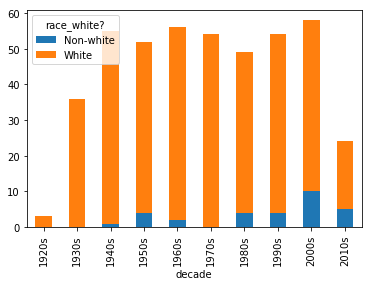

In [105]:
race_by_decade.unstack().plot(kind='bar', stacked=True)